In [11]:
import keras
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import codecs

%matplotlib inline

In [27]:
# make the csv valid
input_file = codecs.open('data/social-media.csv', 'r',encoding='utf-8', errors='replace')
output_file = open('data/social-media-clean.csv', 'w')

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
sanitize_characters(input_file, output_file)

In [28]:
data = pd.read_csv('data/social-media-clean.csv')
data.columns = ['text', 'class', 'label']

# Simple Stats

In [69]:
data.head()

,text,class,label,text_clean
0,Just happened a terrible car crash,RELEVANT,1,just happened terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,RELEVANT,1,our deeds are the reason of this earthquake ma...
2,"Heard about #earthquake is different cities, s...",RELEVANT,1,heard about earthquake is different cities sta...
3,"there is a forest fire at spot pond, geese are...",RELEVANT,1,there is forest fire at spot pond geese are fl...
4,Forest fire near La Ronge Sask. Canada,RELEVANT,1,forest fire near la ronge sask canada


In [70]:
data.tail()

,text,class,label,text_clean
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,RELEVANT,1,m1 94 01 04 utc 5km of volcano hawaii
10872,Police investigating after an e-bike collided ...,RELEVANT,1,police investigating after an bike collided wi...
10873,The Latest: More Homes Razed by Northern Calif...,RELEVANT,1,the latest more homes razed by northern califo...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,RELEVANT,1,meg issues hazardous weather outlook hwo
10875,#CityofCalgary has activated its Municipal Eme...,RELEVANT,1,cityofcalgary has activated its municipal emer...


In [71]:
data.describe()

,label
count,10876.000000
mean,0.432604
std,0.498420
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [72]:
data.isnull().sum()

text          0
class         0
label         0
text_clean    0
dtype: int64

In [73]:
data.groupby('class').count()

,text,label,text_clean
class,,,
IRRELEVANT,6187,6187,6187
RELEVANT,4673,4673,4673
UNTAGGED,16,16,16


In [74]:
def refactor_class_name(name):
    if name == 'Not Relevant':
        return 'IRRELEVANT'
    elif name == 'Relevant':
        return 'RELEVANT'
    elif name == "Can't Decide":
        return 'UNTAGGED'
    else:
        return None

In [75]:
# change class values
data['class'] = data['class'].apply(refactor_class_name)

In [76]:
data.head()

,text,class,label,text_clean
0,Just happened a terrible car crash,None,1,just happened terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,None,1,our deeds are the reason of this earthquake ma...
2,"Heard about #earthquake is different cities, s...",None,1,heard about earthquake is different cities sta...
3,"there is a forest fire at spot pond, geese are...",None,1,there is forest fire at spot pond geese are fl...
4,Forest fire near La Ronge Sask. Canada,None,1,forest fire near la ronge sask canada


In [77]:
data.groupby('class').count()

,text,label,text_clean
class,,,


# Data Cleaning

In [78]:
def clean_text(text):
    """
        Remove urls, twitter handle names, etc
    """
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'http', ' ', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'@', ' at ', text)
    
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"won't", "will not ", text)
    text = re.sub(r"isn't", "is not ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('\W', ' ', text)
    #text = re.sub(r'\d+', ' <number> ', text)
    
    text = re.sub(r'\s+', ' ', text)
    text = text.lower().strip()
    return ' '.join([token for token in text.split() if len(token)>1])

In [79]:
data['text_clean'] = data['text'].apply(clean_text)

In [80]:
data.head()

,text,class,label,text_clean
0,Just happened a terrible car crash,None,1,just happened terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,None,1,our deeds are the reason of this earthquake ma...
2,"Heard about #earthquake is different cities, s...",None,1,heard about earthquake is different cities sta...
3,"there is a forest fire at spot pond, geese are...",None,1,there is forest fire at spot pond geese are fl...
4,Forest fire near La Ronge Sask. Canada,None,1,forest fire near la ronge sask canada


In [81]:
data.tail()

,text,class,label,text_clean
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,None,1,m1 94 01 04 utc 5km of volcano hawaii
10872,Police investigating after an e-bike collided ...,None,1,police investigating after an bike collided wi...
10873,The Latest: More Homes Razed by Northern Calif...,None,1,the latest more homes razed by northern califo...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,None,1,meg issues hazardous weather outlook hwo
10875,#CityofCalgary has activated its Municipal Eme...,None,1,cityofcalgary has activated its municipal emer...


In [82]:
data['tokens'] = data['text_clean'].apply(lambda x : x.split())

In [84]:
data.head()

,text,class,label,text_clean,tokens
0,Just happened a terrible car crash,None,1,just happened terrible car crash,"[just, happened, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,None,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
2,"Heard about #earthquake is different cities, s...",None,1,heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",None,1,there is forest fire at spot pond geese are fl...,"[there, is, forest, fire, at, spot, pond, gees..."
4,Forest fire near La Ronge Sask. Canada,None,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"


# Data Exploration

In [85]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [90]:
all_words = [word for tokens in data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tokens"]]
VOCAB = sorted(list(set(all_words)))

In [91]:
print("Total Number of words :: {}".format(len(all_words)))
print("Vocab size :: {}".format(len(VOCAB)))
print("Max and Min Sentence Lengths :: {},{}".format(max(sentence_lengths), min(sentence_lengths)))

Total Number of words :: 144405
Vocab size :: 18128
Max and Min Sentence Lengths :: 30,1


## Count Sentence Length

In [100]:
freq = nltk.FreqDist(sentence_lengths)
freq

FreqDist({11: 730, 10: 698, 15: 671, 16: 665, 13: 645, 9: 643, 17: 643, 14: 639, 12: 629, 8: 559, ...})

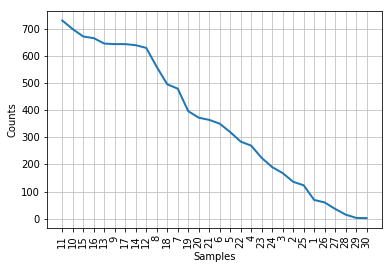

In [101]:
freq.plot()

(array([ 373.,  938., 1681., 2057., 1955., 1803., 1132.,  698.,  219.,
          20.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

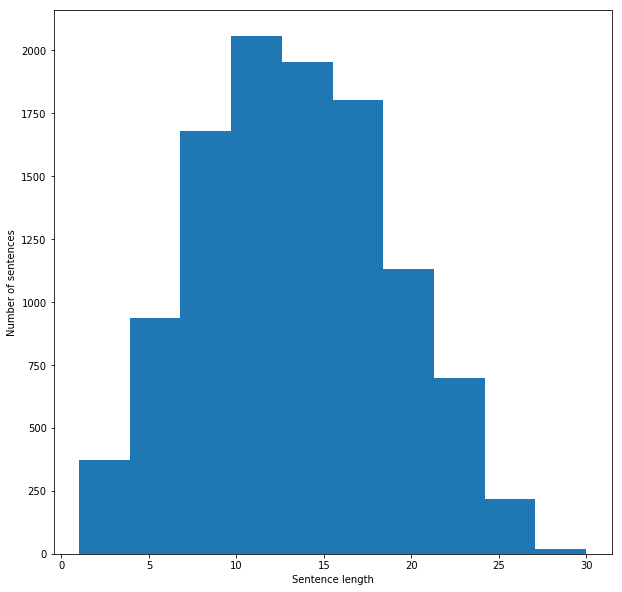

In [102]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)

### Thoughts
It seems, the sentence lenght of around **11** occurs maximum time